1) Email Spam — Logistic Regression (binary)

Accuracy: 0.475
Precision: 0.2
Recall: 0.05555555555555555
F1 Score: 0.08695652173913043
ROC-AUC: 0.31313131313131315
Confusion Matrix:
 [[18  4]
 [17  1]]


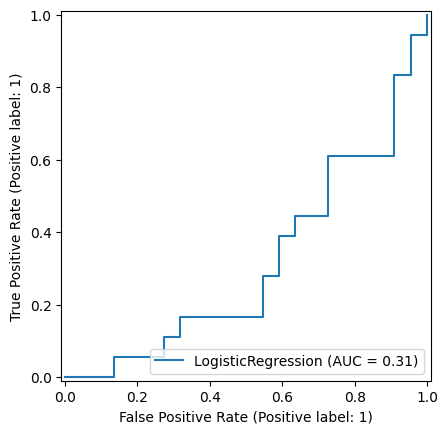

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay

df = pd.read_csv('DATASETS/email_spam.csv')

X = df[['word_free', 'word_offer', 'word_click', 'num_links', 'num_caps', 'sender_reputation']]
y = df['is_spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)

2) Customer Churn — Logistic Regression (binary)

Accuracy: 0.525
Precision: 0.5416666666666666
Recall: 0.6190476190476191
F1 Score: 0.5777777777777777
ROC-AUC: 0.4736842105263158
Confusion Matrix:
 [[ 8 11]
 [ 8 13]]


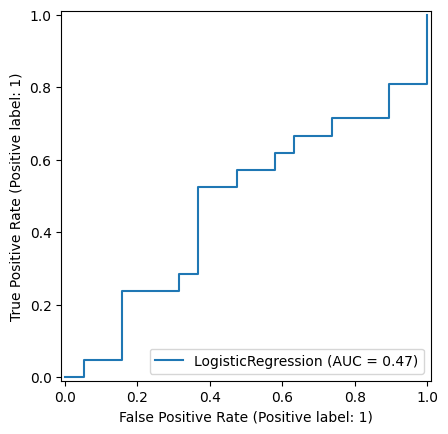

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay

df = pd.read_csv('DATASETS/customer_churn.csv')

X = df[['tenure_months', 'monthly_charges', 'support_tickets', 'is_premium', 'avg_usage_hours']]
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)

3) Disease Stage — Multiclass Logistic Regression

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

df = pd.read_csv('DATASETS/disease_stage.csv')

X = df[['age', 'b1', 'b2', 'b3', 'b4']]
y = df['stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro-F1:", f1_score(y_test, y_pred, average='macro'))
print("Weighted-F1:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.325
Macro-F1: 0.2833333333333333
Weighted-F1: 0.29500000000000004
Confusion Matrix:
 [[9 3 3]
 [6 1 6]
 [6 3 3]]


4) Flowers — k-NN Classification with CV

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('DATASETS/flowers.csv')

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_k = 1
best_score = 0
for k in range(1, 26, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred = knn_best.predict(X_test_scaled)

print("Best k:", best_k)
print("CV Score:", best_score)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best k: 25
CV Score: 0.325
Test Accuracy: 0.425
Confusion Matrix:
 [[8 2 4]
 [7 2 4]
 [3 3 7]]


5) Airbnb Prices — k-NN Regression with CV

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = pd.read_csv('DATASETS/airbnb.csv')

X = df[['size_m2', 'distance_center_km', 'rating', 'num_reviews']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_k = 1
best_cv_rmse = np.inf
for k in range(1, 26, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error')
    mean_rmse = -scores.mean()
    if mean_rmse < best_cv_rmse:
        best_cv_rmse = mean_rmse
        best_k = k

knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred = knn_best.predict(X_test_scaled)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

print("Best k:", best_k)
print("CV RMSE:", best_cv_rmse)
print("Test RMSE:", test_rmse)
print("Test R²:", test_r2)


Best k: 25
CV RMSE: 143.60221534935525
Test RMSE: 113.13890983519951
Test R²: -0.1616135778243346
